<a href="https://colab.research.google.com/github/rajuiit/ResearchPaperEvaluationRNN/blob/master/RPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import math, time
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [0]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/ResearchpaperratingRNN/ResearchPaperEvaluation/data.csv',delimiter=',',encoding='latin-1')
data.head()

,paperid,reviewerid,completed,total_sum,pccomments,authorcomments,q1,q2,q3,q4,q5,q6,q7,title,keywords,abstract,accept,type_presentation
0,2,8962,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demo Paper,Testing,Will be updated soon!,Reject,NaN
1,6,8178,T,19.0,"<p>Overall, the paper has useful information, ...",<p>The subject paper presents a reduced switch...,4.0,3.0,2.0,2.0,3.0,Oral Presentation,5.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
2,6,9227,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
3,6,9261,T,18.0,0,"<p>May be accepted, but need to improve. What ...",2.0,3.0,3.0,2.0,3.0,Poster Presentation,5.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN
4,6,9390,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject,NaN


In [0]:
dataset = data[['reviewerid','authorcomments', 'total_sum', 'title', 'keywords', 'abstract', 'accept']]

In [0]:
dataset.head(3)

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
0,8962,NaN,NaN,Demo Paper,Testing,Will be updated soon!,Reject
1,8178,<p>The subject paper presents a reduced switch...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
2,9227,NaN,NaN,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject


In [0]:
df = dataset

In [0]:
dataset = dataset.dropna()

In [0]:
dataset.head()

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
1,8178,<p>The subject paper presents a reduced switch...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
3,9261,"<p>May be accepted, but need to improve. What ...",18.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",Reject
7,9027,<p>Please edit the following errors:<br /><br ...,23.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,Accept
8,9464,<ol>\n<li>There is no previous work section.</...,20.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,Accept
9,8967,<p>The paper present multi-view 3D object is r...,23.0,Multi-View 3D Object Retrieval using Autoencod...,"Convolutional Neural Network, Deep Embedding N...","Due to the rapid development of 3D object, the...",Accept


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
dataset['authorcomments'] = dataset['authorcomments'].str.strip()
dataset['title'] = dataset['title'].str.strip()
dataset['keywords'] = dataset['keywords'].str.strip()
dataset['abstract'] = dataset['abstract'].str.strip()
dataset['accept'] = dataset['accept'].str.strip()

In [0]:
import bs4
dataset['authorcomments'] = dataset['authorcomments'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())
dataset['accept'] = dataset['accept'].map({'Reject':0, 'Accept':1})
dataset = dataset.dropna()
dataset['accept'] = dataset['accept'].astype(int)

In [0]:
dataset.head(3)

,reviewerid,authorcomments,total_sum,title,keywords,abstract,accept
1,8178,The subject paper presents a reduced switch se...,19.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",0
3,9261,"May be accepted, but need to improve. What are...",18.0,Performance Evaluation of Reduced Switch Seven...,Multilevel inverter; Total Harmonic Distortion...,"With the development of inverter topologies, m...",0
7,9027,Please edit the following errors:# Spelling Er...,23.0,"GSM Based Low-cost Gas Leakage, Explosion and ...","Arduino UNO, MQ-9, Low-cost, Explosion, Securi...",Gas leakage and gas cylinder explosion is a re...,1


In [0]:
dataset.to_csv(r'clean.csv')

In [0]:
df.drop(['reviewerid', 'total_sum'],axis=1,inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 5 columns):
authorcomments    1849 non-null object
title             2734 non-null object
keywords          2734 non-null object
abstract          2734 non-null object
accept            2734 non-null object
dtypes: object(5)
memory usage: 106.9+ KB


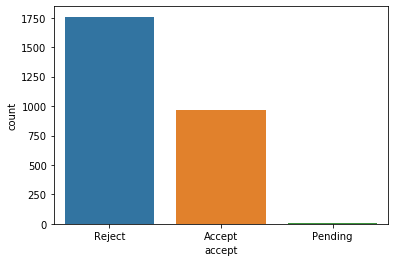

In [0]:
sns.countplot(df.accept)

In [0]:
df = df[['abstract', 'accept']]

In [0]:
df.dropna(inplace=True)

In [0]:
df['accept'] = df['accept'].map({'Reject':0, 'Accept':1})
df = df.dropna()
df['accept'] = df['accept'].astype(int)

In [0]:
X = df.abstract
#[['authorcomments', 'title', 'keywords', 'abstract']]

In [0]:
Y = df.accept

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
print(X.shape)
print(Y.shape)

(2727,)
(2727,)


In [0]:
history = model.fit(sequences_matrix,y_train,batch_size=50,epochs=25,
          validation_split=0.2)

Train on 1853 samples, validate on 464 samples
Epoch 1/25
1853/1853 [==============================] - 8s 4ms/step - loss: 0.6356 - acc: 0.6427 - val_loss: 0.9721 - val_acc: 0.6940
Epoch 2/25
1853/1853 [==============================] - 6s 3ms/step - loss: 0.4608 - acc: 0.8057 - val_loss: 0.4518 - val_acc: 0.7953
Epoch 3/25
1853/1853 [==============================] - 7s 4ms/step - loss: 0.2867 - acc: 0.8894 - val_loss: 1.0100 - val_acc: 0.7392
Epoch 4/25
1853/1853 [==============================] - 6s 3ms/step - loss: 0.2188 - acc: 0.9261 - val_loss: 0.3762 - val_acc: 0.8341
Epoch 5/25
1853/1853 [==============================] - 7s 4ms/step - loss: 0.1611 - acc: 0.9498 - val_loss: 0.3991 - val_acc: 0.8772
Epoch 6/25
1853/1853 [==============================] - 6s 3ms/step - loss: 0.1033 - acc: 0.9692 - val_loss: 0.3040 - val_acc: 0.9159
Epoch 7/25
1853/1853 [==============================] - 6s 3ms/step - loss: 0.0840 - acc: 0.9730 - val_loss: 0.2988 - val_acc: 0.9030
Epoch 8/25
1853

In [0]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
accr = model.evaluate(test_sequences_matrix,y_test)

410/410 [==============================] - 0s 759us/step


In [0]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.624
  Accuracy: 0.937


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

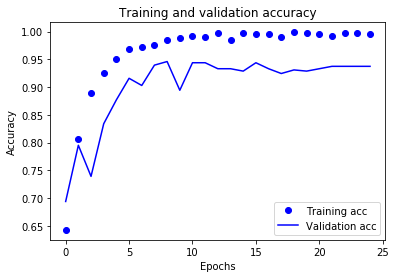

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(sequences_matrix, y_train)

In [0]:
y_pred = svclassifier.predict(test_sequences_matrix)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [0]:
print(classification_report(y_test,y_pred))

In [0]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import math, time
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
embedding_vecor_length = 50


In [0]:
def CNN():
      embedding_vecor_length = 32
      inputs= Input(name='inputs',shape=[max_len])
      layer=Embedding(max_words, embedding_vecor_length, input_length=max_len)(inputs)
      layer=Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(layer)
      layer=MaxPooling1D(pool_size=2)(layer)
      layer= LSTM(100)(layer)
      layer= Dense(1, activation='sigmoid')(layer)
      model = Model(inputs=inputs,outputs=layer)
      return model


In [0]:
model = CNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 150, 32)           32000     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 88,405
Trainable params: 88,405
Non-trainable params: 0
_______________________________________________________

In [0]:
print(X.shape)
print(Y.shape)



(2727,)
(2727,)


In [0]:

history = model.fit(sequences_matrix,y_train,batch_size=50,epochs=25,
          validation_split=0.2)



Train on 1853 samples, validate on 464 samples
Epoch 1/25
1853/1853 [==============================] - 6s 3ms/step - loss: 0.6553 - acc: 0.6357 - val_loss: 0.6171 - val_acc: 0.6789
Epoch 2/25
1853/1853 [==============================] - 5s 3ms/step - loss: 0.5628 - acc: 0.6643 - val_loss: 0.4649 - val_acc: 0.8147
Epoch 3/25
1853/1853 [==============================] - 5s 3ms/step - loss: 0.3705 - acc: 0.8645 - val_loss: 0.3887 - val_acc: 0.8405
Epoch 4/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.2694 - acc: 0.9039 - val_loss: 0.3154 - val_acc: 0.8685
Epoch 5/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.1572 - acc: 0.9450 - val_loss: 0.2676 - val_acc: 0.9073
Epoch 6/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.0823 - acc: 0.9773 - val_loss: 0.2451 - val_acc: 0.9224
Epoch 7/25
1853/1853 [==============================] - 4s 2ms/step - loss: 0.0392 - acc: 0.9887 - val_loss: 0.2435 - val_acc: 0.9353
Epoch 8/25
1853

In [0]:
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
accr = model.evaluate(test_sequences_matrix,y_test)

410/410 [==============================] - 0s 592us/step


In [0]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.313
  Accuracy: 0.944


In [0]:
scores = model.evaluate(test_sequences_matrix,y_test)


410/410 [==============================] - 0s 582us/step


In [0]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.39%
